# Movies - Cleaning, Manipulating and Analysis Project

### About Dataset
**Context**
Is the movie industry dying? is Netflix the new entertainment king? Those were the first questions that lead me to create a dataset
focused on movie revenue and analyze it over the last decades. But, why stop there? There are more factors that intervene in this
kind of thing, like actors, genres, user ratings and more. And now, anyone with experience (you) can ask specific questions about the
movie industry, and get answers.

**Content**
There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

* budget: the budget of a movie. Some movies don't have this, so it appears as 0

* company: the production company

* country: country of origin

* director: the director

* genre: main genre of the movie.

* gross: revenue of the movie

* name: name of the movie

* rating: rating of the movie (R, PG, etc.)

* released: release date (YYYY-MM-DD)

* runtime: duration of the movie

* score: IMDb user rating

* votes: number of user votes

* star: main actor/actress

* writer: writer of the movie

* year: year of release

**Acknowledgements**
This data was scraped from IMDb.

for detail of dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies

In [111]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjust the configuration of the plots we will create

In [55]:
# Read the data
df = pd.read_csv('movies.csv')

In [46]:
# Let's look at the data first five rows 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [47]:
# Let Check the datatypes of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [48]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


# Cleaning the Dataset

In [51]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


### Split Column 'released' into 'releasedDate' and 'releasedCountry' Columns

In [56]:
# he released date and country are in the same cell. Lets separate them into different columns.
releasedCountry = df['released'].str.split(pat='(', expand=True)
releasedCountry

,0,1
0,"June 13, 1980",United States)
1,"July 2, 1980",United States)
2,"June 20, 1980",United States)
3,"July 2, 1980",United States)
4,"July 25, 1980",United States)
...,...,...
7663,"October 23, 2020",United States)
7664,"February 7, 2020",United States)
7665,"April 27, 2020",Cameroon)
7666,"October 1, 2020",United States)


In [57]:
# Joining the above dataframe with our main dataset
df = pd.concat([df, releasedCountry], axis=1)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,0,1
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States)


In [58]:
# Rename columns names
df = df.rename(columns = {0: 'releasedDate', 1:'releasedCountry'})
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States)


In [59]:
# Remove clossing bracket from releasedCountry
df['releasedCountry'] =  df['releasedCountry'].astype(str).str.replace(')','')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


In [61]:
# Remove potential leading/trailing whitespaces from relesedDate & relesedCountry
stripCol = ['releasedDate', 'releasedCountry']

for col in stripCol:
    df[col] = df[col].astype(str).str.strip()

In [62]:
# Deleting the released columns
del df['released']

In [63]:
# Let's check the dataframe
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


### Deleting row with NaN values (in any column)

In [64]:
#Looking at all rows with >=1 NaN values in any of the columns
df[df.isnull().any(axis=1)]

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry
16,Fame,R,Drama,1980,6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0,"May 16, 1980",United States
19,Stir Crazy,R,Comedy,1980,6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0,"December 12, 1980",United States
24,Urban Cowboy,PG,Drama,1980,6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0,"June 6, 1980",United States
25,Altered States,R,Horror,1980,6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0,"December 25, 1980",United States
26,Little Darlings,R,Comedy,1980,6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0,"March 21, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,"October 23, 2020",United States
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,"February 7, 2020",United States
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,"April 27, 2020",Cameroon
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,"October 1, 2020",United States


Out of a total of 7.6k rows, 2.6k contain NaN values.
Let's Deleting all rows NaN values.

In [65]:
# Couting column-wise Nan values
for col in df.columns:
    print(col, '-', df[col].isnull().sum())

name - 0
rating - 77
genre - 0
year - 0
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4
releasedDate - 0
releasedCountry - 0


In [66]:
# Drop all row with NaN values
df = df.dropna()

In [67]:
# let's check to make sure there are no NaN
for col in df.columns:
    print(col,'-', df[col].isnull().sum())

name - 0
rating - 0
genre - 0
year - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 0
budget - 0
gross - 0
company - 0
runtime - 0
releasedDate - 0
releasedCountry - 0


In [68]:
# Count total rows remaining after dropping NaN
df.count()

name               5421
rating             5421
genre              5421
year               5421
score              5421
votes              5421
director           5421
writer             5421
star               5421
country            5421
budget             5421
gross              5421
company            5421
runtime            5421
releasedDate       5421
releasedCountry    5421
dtype: int64

Inconsistency between release year in 'year' vs 'releasedDate' column

In [69]:
# Replace 'year' column values with the year in releasedDate
df['year'] = df['releasedDate'].astype(str).str[-4:]

In [72]:
# Let's Checkt it
df.head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States
5,Friday the 13th,R,Horror,1980,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,"May 9, 1980",United States
6,The Blues Brothers,R,Action,1980,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,"June 20, 1980",United States
7,Raging Bull,R,Biography,1980,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,"December 19, 1980",United States
8,Superman II,PG,Action,1981,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,"June 19, 1981",United States
9,The Long Riders,R,Biography,1980,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,"May 16, 1980",United States


In [73]:
#  Check for duplicate rows
df.duplicated().sum()

0

In [74]:
# Changing 'year' from string to int64, so describe() can work with it
df['year'] = df['year'].astype('int64')

In [75]:
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.814794,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.550774,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


* Year Range is from Year 1980 to 2020
* Min. Budget = 6 x 10e3, Max. Budget = 3.56 x 10e8
* Min. Gross = 3.0 x 10e2, Max. Gross = 2.84 x 10e9

In [76]:
# What's name of company is unique()
df.company.unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Clubhouse Pictures (II)', '20th Century Studios',
       'Beijing Diqi Yinxiang Entertainment'], dtype=object)

In [78]:
# Create a dataframe of sorted unique company names
companyListSorted = np.sort(df.company.unique())
companyList = pd.DataFrame(companyListSorted, columns=['company'])
companyList

,company
0,"""DIA"" Productions GmbH & Co. KG"
1,"""Weathering With You"" Film Partners"
2,.406 Production
3,1492 Pictures
4,1818 Productions
...,...
1470,erbp
1471,i am OTHER
1472,i5 Films
1473,micro_scope


Divisions of same parent company:

Example:

Dreamworks

* 549 DreamWorks
* 550 DreamWorks Animation
* 551 Dreamworks Pictures

In [79]:
# Let's looking all company names containing the word "DreamWorks"
df[df['company'].str.contains('Dreamworks', case= False)].sort_values(by=['company'])

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry
6228,A Thousand Words,PG-13,Comedy,2012,5.9,41000.0,Brian Robbins,Steve Koren,Eddie Murphy,United States,40000000.0,22044277.0,DreamWorks,91.0,"March 9, 2012",United States
7367,The House with a Clock in Its Walls,PG,Comedy,2018,6.1,48000.0,Eli Roth,John Bellairs,Jack Black,United States,42000000.0,131523093.0,DreamWorks,105.0,"September 21, 2018",United States
5097,Shrek the Third,PG,Animation,2007,6.1,288000.0,Chris Miller,Jeffrey Price,Mike Myers,United States,160000000.0,813367380.0,DreamWorks,93.0,"May 18, 2007",United States
5857,The Help,PG-13,Drama,2011,8.0,436000.0,Tate Taylor,Tate Taylor,Emma Stone,United States,25000000.0,216639112.0,DreamWorks,146.0,"August 10, 2011",United States
6997,Office Christmas Party,R,Comedy,2016,5.9,72000.0,Josh Gordon,Jon Lucas,Jason Bateman,United States,45000000.0,114501299.0,DreamWorks,105.0,"December 9, 2016",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,The Terminal,PG-13,Comedy,2004,7.4,421000.0,Steven Spielberg,Andrew Niccol,Tom Hanks,United States,60000000.0,219100084.0,Dreamworks Pictures,128.0,"June 18, 2004",United States
4444,EuroTrip,R,Comedy,2004,6.6,200000.0,Jeff Schaffer,Alec Berg,Scott Mechlowicz,United States,25000000.0,22605153.0,Dreamworks Pictures,92.0,"February 20, 2004",United States
4414,Head of State,PG-13,Comedy,2003,5.5,18000.0,Chris Rock,Chris Rock,Chris Rock,United States,35200000.0,38620484.0,Dreamworks Pictures,95.0,"March 28, 2003",United States
4387,Biker Boyz,PG-13,Action,2003,4.7,13000.0,Reggie Rock Bythewood,Michael Gougis,Laurence Fishburne,United States,24000000.0,23510621.0,Dreamworks Pictures,110.0,"January 31, 2003",United States


# Manipulating the Dataset

Creating "parent_company" column, to contain parent company of subdivisions

**NOTE**: **The problem** , If we group by the **'company'** column, multiple subdivisions of the same parent company are present.

e.g. - **Marvel**[Parent Company]
> 1. Marvel Studios
> 2. Marvel Entertainment
> 3. Marvel Enterprises

If we want to know average gross, budget etc. of Marvel, we need a **parent_company** column which contains the value **"Marvel"** for all these various subdivisions

In [81]:
df_sub_25 = df.groupby(['company'], as_index = False).mean().sort_values(by=['gross'], ascending = False).head(25)
df_sub_25

,company,year,score,votes,budget,gross,runtime
983,Marvel Studios,2015.750000,7.600000,773833.333333,2.220000e+08,1.255466e+09,135.583333
820,Illumination Entertainment,2016.000000,6.350000,168500.000000,7.700000e+07,1.097122e+09,90.000000
628,Fairview Entertainment,2016.000000,7.400000,264000.000000,1.750000e+08,9.665549e+08,106.000000
190,B24,2015.000000,6.800000,393000.000000,2.450000e+08,8.806815e+08,148.000000
182,Avi Arad Productions,2018.000000,6.700000,387000.000000,1.000000e+08,8.560852e+08,112.000000
406,Chris Morgan Productions,2019.000000,6.400000,184000.000000,2.000000e+08,7.590569e+08,137.000000
870,Jolie Pas,2014.000000,7.000000,353000.000000,1.800000e+08,7.584118e+08,97.000000
945,Lucasfilm,1999.400000,7.430000,616100.000000,1.149000e+08,7.185352e+08,125.800000
982,Marvel Entertainment,2014.000000,7.700000,764000.000000,1.700000e+08,7.144215e+08,136.000000
227,Beijing Dengfeng International Culture Communi...,2019.000000,6.000000,28000.000000,4.800000e+07,6.999925e+08,125.000000


In [82]:
df_sub_25 = df_sub_25.reset_index(drop=True)
df_sub_25

,company,year,score,votes,budget,gross,runtime
0,Marvel Studios,2015.750000,7.600000,773833.333333,2.220000e+08,1.255466e+09,135.583333
1,Illumination Entertainment,2016.000000,6.350000,168500.000000,7.700000e+07,1.097122e+09,90.000000
2,Fairview Entertainment,2016.000000,7.400000,264000.000000,1.750000e+08,9.665549e+08,106.000000
3,B24,2015.000000,6.800000,393000.000000,2.450000e+08,8.806815e+08,148.000000
4,Avi Arad Productions,2018.000000,6.700000,387000.000000,1.000000e+08,8.560852e+08,112.000000
5,Chris Morgan Productions,2019.000000,6.400000,184000.000000,2.000000e+08,7.590569e+08,137.000000
6,Jolie Pas,2014.000000,7.000000,353000.000000,1.800000e+08,7.584118e+08,97.000000
7,Lucasfilm,1999.400000,7.430000,616100.000000,1.149000e+08,7.185352e+08,125.800000
8,Marvel Entertainment,2014.000000,7.700000,764000.000000,1.700000e+08,7.144215e+08,136.000000
9,Beijing Dengfeng International Culture Communi...,2019.000000,6.000000,28000.000000,4.800000e+07,6.999925e+08,125.000000


**NOTE:** The 1st and 7th place are both occupied by Marvel

In [83]:
# Creating parent_company to contain paret of subdivisions
df['parent_company'] = df['company']

### Create Parent Company - DreamWorks

In [84]:
df.loc[(df['company'].str.contains('DreamWorks', case=False)), 'parent_company'] = 'DreamWorks'

In [85]:
df[df['parent_company'] == 'DreamWorks'][['company', 'parent_company']]

,company,parent_company
3106,Dreamworks Pictures,DreamWorks
3116,Dreamworks Pictures,DreamWorks
3120,Dreamworks Pictures,DreamWorks
3244,Dreamworks Pictures,DreamWorks
3278,DreamWorks Animation,DreamWorks
...,...,...
7367,DreamWorks,DreamWorks
7462,Dreamworks Pictures,DreamWorks
7509,DreamWorks Animation,DreamWorks
7545,DreamWorks Animation,DreamWorks


### Create Parent company - Paramount

In [86]:
df.loc[(df['company'].str.contains('Paramount', case=False)), 'parent_company'] = 'Paramount'

In [87]:
df[df['parent_company'] == 'Paramount'][['company', 'parent_company']]

,company,parent_company
3,Paramount Pictures,Paramount
5,Paramount Pictures,Paramount
12,Paramount Pictures,Paramount
13,Paramount Pictures,Paramount
29,Paramount Pictures,Paramount
...,...,...
7484,Paramount Pictures,Paramount
7502,Paramount Pictures,Paramount
7521,Paramount Pictures,Paramount
7560,Paramount Animation,Paramount


### Parent Company - Walt Disney

Subdivision excluding Pixar Studios

In [88]:
# Finding Subdivisioin company
df[df['company'].str.contains('Walt Disney', case=False)]['company'].unique()

array(['Walt Disney Productions', 'Walt Disney Animation Studios',
       'Walt Disney Pictures'], dtype=object)

In [89]:
# Create parent_company of Walt disney
df.loc[df['company'].str.contains('Walt Disney', case=False), 'parent_company'] = 'Walt Disney'

In [90]:
df[df['company'].str.contains('Walt Disney', case=False)][['parent_company', 'company']]

,parent_company,company
75,Walt Disney,Walt Disney Productions
117,Walt Disney,Walt Disney Animation Studios
222,Walt Disney,Walt Disney Productions
303,Walt Disney,Walt Disney Productions
381,Walt Disney,Walt Disney Productions
...,...,...
7480,Walt Disney,Walt Disney Pictures
7481,Walt Disney,Walt Disney Pictures
7494,Walt Disney,Walt Disney Animation Studios
7512,Walt Disney,Walt Disney Pictures


and Pixar Studios (owned by Walt Disney 2006 onwards)

In [91]:
# Finding Pixar Studios in year of Walt Disney Owned.
df[(df['company'].str.contains('Pixar', case=False)) & (df['year'].astype('int') >= 2006)]

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry,parent_company
4847,Cars,G,Animation,2006,7.1,381000.0,John Lasseter,John Lasseter,Owen Wilson,United States,120000000.0,4.619919e+08,Pixar Animation Studios,117.0,"June 9, 2006",United States,Pixar Animation Studios
5461,Up,PG,Animation,2009,8.2,962000.0,Pete Docter,Pete Docter,Edward Asner,United States,175000000.0,7.350991e+08,Pixar Animation Studios,96.0,"May 29, 2009",United States,Pixar Animation Studios
6657,Inside Out,PG,Animation,2015,8.1,641000.0,Pete Docter,Pete Docter,Amy Poehler,United States,175000000.0,8.588480e+08,Pixar Animation Studios,95.0,"June 19, 2015",United States,Pixar Animation Studios
6707,The Good Dinosaur,PG,Animation,2015,6.7,106000.0,Peter Sohn,Bob Peterson,Jeffrey Wright,United States,200000000.0,3.322077e+08,Pixar Animation Studios,93.0,"November 25, 2015",United States,Pixar Animation Studios
6908,Finding Dory,PG,Animation,2016,7.3,250000.0,Andrew Stanton,Andrew Stanton,Ellen DeGeneres,United States,200000000.0,1.028571e+09,Pixar Animation Studios,97.0,"June 17, 2016",United States,Pixar Animation Studios
7110,Cars 3,G,Animation,2017,6.7,82000.0,Brian Fee,Brian Fee,Owen Wilson,United States,175000000.0,3.839307e+08,Pixar Animation Studios,102.0,"June 16, 2017",United States,Pixar Animation Studios
7488,Toy Story 4,G,Animation,2019,7.7,217000.0,Josh Cooley,John Lasseter,Tom Hanks,United States,200000000.0,1.073395e+09,Pixar Animation Studios,100.0,"June 21, 2019",United States,Pixar Animation Studios


In [93]:
# Create parent_company
df.loc[(df['company'].str.contains('Pixar', case=False)) & (df['year'].astype('int') >= 2006), 'parent_company'] = 'Walt Disney'

In [94]:
# Checking that from 2006 onwards, Pixar's parent is Walt Disney
df[(df['company'].str.contains('Pixar', case=False))].sort_values(by='year')[['year', 'company', 'parent_company']]

,year,company,parent_company
3260,1998,Pixar Animation Studios,Pixar Animation Studios
3470,1999,Pixar Animation Studios,Pixar Animation Studios
3848,2001,Pixar Animation Studios,Pixar Animation Studios
4259,2003,Pixar Animation Studios,Pixar Animation Studios
4455,2004,Pixar Animation Studios,Pixar Animation Studios
4847,2006,Pixar Animation Studios,Walt Disney
5461,2009,Pixar Animation Studios,Walt Disney
6657,2015,Pixar Animation Studios,Walt Disney
6707,2015,Pixar Animation Studios,Walt Disney
6908,2016,Pixar Animation Studios,Walt Disney


### Parent Company - Lucasfilm (Star Wars)

In [95]:
# let's check Lucasfilms
df[df['company'].str.contains('Lucasfilm', case=False)]

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry,parent_company
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,5.383751e+08,Lucasfilm,124.0,"June 20, 1980",United States,Lucasfilm
333,Star Wars: Episode VI - Return of the Jedi,PG,Action,1983,8.3,973000.0,Richard Marquand,Lawrence Kasdan,Mark Hamill,United States,32500000.0,4.751062e+08,Lucasfilm,131.0,"May 25, 1983",United States,Lucasfilm
1271,The Land Before Time,G,Animation,1988,7.4,82000.0,Don Bluth,Stu Krieger,Pat Hingle,United States,12500000.0,8.446085e+07,Lucasfilm,69.0,"November 18, 1988",United States,Lucasfilm
1341,Tucker: The Man and His Dream,PG,Biography,1988,6.9,17000.0,Francis Ford Coppola,Arnold Schulman,Jeff Bridges,United States,23000000.0,1.965264e+07,Lucasfilm,110.0,"August 12, 1988",United States,Lucasfilm
3451,Star Wars: Episode I - The Phantom Menace,PG,Action,1999,6.5,748000.0,George Lucas,George Lucas,Ewan McGregor,United States,115000000.0,1.027083e+09,Lucasfilm,136.0,"May 19, 1999",United States,Lucasfilm
4058,Star Wars: Episode II - Attack of the Clones,PG,Action,2002,6.5,658000.0,George Lucas,George Lucas,Hayden Christensen,United States,115000000.0,6.537800e+08,Lucasfilm,142.0,"May 16, 2002",United States,Lucasfilm
4658,Star Wars: Episode III - Revenge of the Sith,PG-13,Action,2005,7.5,729000.0,George Lucas,George Lucas,Hayden Christensen,United States,113000000.0,8.683906e+08,Lucasfilm,140.0,"May 19, 2005",United States,Lucasfilm
5366,Star Wars: The Clone Wars,PG,Animation,2008,5.9,61000.0,Dave Filoni,Henry Gilroy,Matt Lanter,United States,8500000.0,6.828284e+07,Lucasfilm Animation,98.0,"August 15, 2008",United States,Lucasfilm Animation
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"December 18, 2015",United States,Lucasfilm
6869,Rogue One: A Star Wars Story,PG-13,Action,2016,7.8,572000.0,Gareth Edwards,Chris Weitz,Felicity Jones,United States,200000000.0,1.056058e+09,Lucasfilm,133.0,"December 16, 2016",United States,Lucasfilm


In [96]:
# Create parent_company
df.loc[df['company'].str.contains('Lucasfilm', case=False), 'parent_company'] = 'Lucasfilm'

In [97]:
df[df['company'].str.contains('Lucasfilm', case=False)][['company', 'parent_company']]

,company,parent_company
2,Lucasfilm,Lucasfilm
333,Lucasfilm,Lucasfilm
1271,Lucasfilm,Lucasfilm
1341,Lucasfilm,Lucasfilm
3451,Lucasfilm,Lucasfilm
4058,Lucasfilm,Lucasfilm
4658,Lucasfilm,Lucasfilm
5366,Lucasfilm Animation,Lucasfilm
6663,Lucasfilm,Lucasfilm
6869,Lucasfilm,Lucasfilm


### Parent Company - Warner Bros

In [98]:
# Let's check unique name of Warner's
df[df['company'].str.contains('Warner', case=False)]['company'].unique()

array(['Warner Bros.', 'Warner Bros. Family Entertainment',
       'Warner Bros. Animation', 'Warner Independent Pictures (WIP)',
       'Warner Bros. Digital Distribution', 'Warner Bros. Pictures',
       'Warner Animation Group'], dtype=object)

In [99]:
df.loc[df['company'].str.contains('Warner', case=False)].sort_values(by='company')[['company', 'parent_company']]

,company,parent_company
7401,Warner Animation Group,Warner Animation Group
0,Warner Bros.,Warner Bros.
5191,Warner Bros.,Warner Bros.
5150,Warner Bros.,Warner Bros.
5139,Warner Bros.,Warner Bros.
...,...,...
4781,Warner Independent Pictures (WIP),Warner Independent Pictures (WIP)
5012,Warner Independent Pictures (WIP),Warner Independent Pictures (WIP)
4505,Warner Independent Pictures (WIP),Warner Independent Pictures (WIP)
4933,Warner Independent Pictures (WIP),Warner Independent Pictures (WIP)


### Parent Company - Sony

In [100]:
# Let's check unique Sony's company
df[df['company'].str.contains('Sony', case=False)]['company'].unique()

array(['Sony Pictures Classics', 'Sony Pictures Animation',
       'Sony Pictures Entertainment (SPE)'], dtype=object)

In [101]:
# Let's create parent_company of Sony's
df.loc[df['company'].str.contains('Sony', case=False), 'parent_company'] = 'Sony'

In [102]:
df[df['company'].str.contains('Sony', case=False)][['company', 'parent_company']]

,company,parent_company
4435,Sony Pictures Classics,Sony
5416,Sony Pictures Classics,Sony
5476,Sony Pictures Classics,Sony
5585,Sony Pictures Classics,Sony
6547,Sony Pictures Classics,Sony
6740,Sony Pictures Animation,Sony
6761,Sony Pictures Entertainment (SPE),Sony
7252,Sony Pictures Entertainment (SPE),Sony
7309,Sony Pictures Animation,Sony
7437,Sony Pictures Animation,Sony


### Parent Company - Marvel

In [103]:
# let's check Marvel's company
df[df['company'].str.contains('Marvel', case=False)]

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry,parent_company
4269,Daredevil,PG-13,Action,2003,5.3,209000.0,Mark Steven Johnson,Mark Steven Johnson,Ben Affleck,United States,78000000.0,1.791797e+08,Marvel Enterprises,103.0,"February 14, 2003",United States,Marvel Enterprises
6043,The Avengers,PG-13,Action,2012,8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0,"May 4, 2012",United States,Marvel Studios
6244,Iron Man 3,PG-13,Action,2013,7.1,779000.0,Shane Black,Drew Pearce,Robert Downey Jr.,United States,200000000.0,1.214811e+09,Marvel Studios,130.0,"May 3, 2013",United States,Marvel Studios
6247,Thor: The Dark World,PG-13,Action,2013,6.8,618000.0,Alan Taylor,Christopher L. Yost,Chris Hemsworth,United States,170000000.0,6.447831e+08,Marvel Studios,112.0,"November 8, 2013",United States,Marvel Studios
6443,Guardians of the Galaxy,PG-13,Action,2014,8.0,1100000.0,James Gunn,James Gunn,Chris Pratt,United States,170000000.0,7.733501e+08,Marvel Studios,121.0,"August 1, 2014",United States,Marvel Studios
6448,Captain America: The Winter Soldier,PG-13,Action,2014,7.7,764000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,170000000.0,7.144215e+08,Marvel Entertainment,136.0,"April 4, 2014",United States,Marvel Entertainment
6478,The Amazing Spider-Man 2,PG-13,Action,2014,6.6,427000.0,Marc Webb,Alex Kurtzman,Andrew Garfield,United States,200000000.0,7.089823e+08,Marvel Enterprises,142.0,"May 2, 2014",United States,Marvel Enterprises
6644,Avengers: Age of Ultron,PG-13,Action,2015,7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0,"May 1, 2015",United States,Marvel Studios
6846,Captain America: Civil War,PG-13,Action,2016,7.8,694000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,250000000.0,1.153337e+09,Marvel Studios,147.0,"May 6, 2016",United States,Marvel Studios
6849,Doctor Strange,PG-13,Action,2016,7.5,628000.0,Scott Derrickson,Jon Spaihts,Benedict Cumberbatch,United States,165000000.0,6.777961e+08,Marvel Studios,115.0,"November 4, 2016",United States,Marvel Studios


In [105]:
# create parent_company
df.loc[df['company'].str.contains('Marvel', case=False), 'parent_company'] = 'Marvel'

In [106]:

df[df['company'].str.contains('Marvel', case=False)][['company', 'parent_company']]

,company,parent_company
4269,Marvel Enterprises,Marvel
6043,Marvel Studios,Marvel
6244,Marvel Studios,Marvel
6247,Marvel Studios,Marvel
6443,Marvel Studios,Marvel
6448,Marvel Entertainment,Marvel
6478,Marvel Enterprises,Marvel
6644,Marvel Studios,Marvel
6846,Marvel Studios,Marvel
6849,Marvel Studios,Marvel


# Analysis

### Analyzing Profitability of Parent Companies

Create a profit_pct column for calculating percentage profit on each film

In [107]:
df['profit_pct'] = (df['gross'] - df['budget']) / df['gross']

In [108]:
# Which were the most profitable companies every year?
df_mean = df.groupby(['year', 'parent_company'], as_index=False).mean().sort_values(by=['year','profit_pct'], ascending=False)
df_mean.count()

year              2938
parent_company    2938
score             2938
votes             2938
budget            2938
gross             2938
runtime           2938
profit_pct        2938
dtype: int64

We are grouping **parent_company** (subdivisions will now fall under same company in the aggregated dataframe).

In [109]:
# reset index
df_mean = df_mean.reset_index(drop=True)

# let's check out parent_company profit_pct after year 2015
df_mean[df_mean['year'] >= 2015]

,year,parent_company,score,votes,budget,gross,runtime,profit_pct
0,2020,"""Weathering With You"" Film Partners",7.5,28000.0,11100000.0,193457467.0,112.0,0.942623
1,2020,Beijing Diqi Yinxiang Entertainment,6.8,3700.0,80000000.0,461421559.0,149.0,0.826623
2,2020,Columbia Pictures,6.6,140000.0,90000000.0,426505244.0,124.0,0.788983
3,2020,DreamWorks,8.3,473000.0,95000000.0,384623579.0,119.0,0.753005
4,2020,Paramount,6.5,102000.0,85000000.0,319715683.0,99.0,0.734139
...,...,...,...,...,...,...,...,...
466,2015,Motlys,6.6,12000.0,11000000.0,1160724.0,109.0,-8.476844
467,2015,Sycamore Pictures,6.4,22000.0,6000000.0,422746.0,108.0,-13.192920
468,2015,Silver Reel,6.0,29000.0,7500000.0,381839.0,98.0,-18.641786
469,2015,Red Crown Productions,7.7,76000.0,6000000.0,90777.0,137.0,-65.096038


### Creating a yearwise Index for df_mean - column "rank"

This column will store year-wise ranks of all companies by gross

In [115]:
df_mean['rank'] = np.random.randint(1, size=len(df_mean['year']))
df_mean['rank'] # 0 all
len(df_mean['year'])

2938

In [116]:
# Populating the "rank" column with index resetting every year
curr_year = 2020
ind = 0
ctr = 0

while(ind <= 2937):
    if df_mean['year'][ind] == curr_year:
        df_mean.loc[ind, 'rank'] = ctr
        ctr = ctr + 1
        ind = ind + 1
    else:
        curr_year = curr_year - 1
        ctr = 0

In [117]:
df_mean

,year,parent_company,score,votes,budget,gross,runtime,profit_pct,rank
0,2020,"""Weathering With You"" Film Partners",7.50,28000.0,11100000.0,193457467.0,112.0,0.942623,0
1,2020,Beijing Diqi Yinxiang Entertainment,6.80,3700.0,80000000.0,461421559.0,149.0,0.826623,1
2,2020,Columbia Pictures,6.60,140000.0,90000000.0,426505244.0,124.0,0.788983,2
3,2020,DreamWorks,8.30,473000.0,95000000.0,384623579.0,119.0,0.753005,3
4,2020,Paramount,6.50,102000.0,85000000.0,319715683.0,99.0,0.734139,4
...,...,...,...,...,...,...,...,...,...
2933,1980,Jack Rollins & Charles H. Joffe Productions,7.30,22000.0,10000000.0,10389003.0,89.0,0.037444,20
2934,1980,Mulberry Square Productions,5.40,2400.0,6000000.0,6216067.0,103.0,0.034759,21
2935,1980,Universal Pictures,6.08,42300.0,18200000.0,34536162.8,105.4,-0.032019,22
2936,1980,International Cinema,4.60,2600.0,20000000.0,3763988.0,121.0,-4.313513,23


### Looking at the top N highest Average Grossing companies each year.

The rank column makes it pretty convenient to do this

In [118]:
# Here, N = 3
df_mean[(df_mean['year'] >= 2015) & (df_mean['rank'] <3)]

,year,parent_company,score,votes,budget,gross,runtime,profit_pct,rank
0,2020,"""Weathering With You"" Film Partners",7.50,28000.0,11100000.0,1.934575e+08,112.0,0.942623,0
1,2020,Beijing Diqi Yinxiang Entertainment,6.80,3700.0,80000000.0,4.614216e+08,149.0,0.826623,1
2,2020,Columbia Pictures,6.60,140000.0,90000000.0,4.265052e+08,124.0,0.788983,2
10,2019,Barunson E&A,8.60,631000.0,11400000.0,2.589081e+08,132.0,0.955969,0
11,2019,Carnival Film & Television,7.40,43000.0,13000000.0,2.378600e+08,122.0,0.945346,1
12,2019,Beijing Dengfeng International Culture Communi...,6.00,28000.0,48000000.0,6.999925e+08,125.0,0.931428,2
83,2018,Blumhouse Productions,5.65,72250.0,9125000.0,1.639719e+08,101.5,0.942437,0
84,2018,Atomic Monster,5.30,127000.0,22000000.0,3.655517e+08,96.0,0.939817,1
85,2018,Mooz Films,8.40,71000.0,4000000.0,6.441700e+07,126.0,0.937905,2
170,2017,Sailor Bear,6.90,64000.0,100000.0,1.951683e+06,92.0,0.948762,0


### Correlation Analysis [Company-wise]

In [119]:
df_mean[df_mean['year'] >= 2010].corr(method='pearson')

,year,score,votes,budget,gross,runtime,profit_pct,rank
year,1.000000,0.005711,-0.070479,0.129663,0.124687,0.116901,0.036426,0.010477
score,0.005711,1.000000,0.463113,0.111061,0.189731,0.415347,0.092604,-0.194692
votes,-0.070479,0.463113,1.000000,0.548246,0.650938,0.400666,0.078406,-0.346491
budget,0.129663,0.111061,0.548246,1.000000,0.805647,0.369062,0.052058,-0.104553
gross,0.124687,0.189731,0.650938,0.805647,1.000000,0.283071,0.071488,-0.337553
runtime,0.116901,0.415347,0.400666,0.369062,0.283071,1.000000,0.020135,0.031174
profit_pct,0.036426,0.092604,0.078406,0.052058,0.071488,0.020135,1.000000,-0.201651
rank,0.010477,-0.194692,-0.346491,-0.104553,-0.337553,0.031174,-0.201651,1.000000


There is high correlation between **budget** and **gross**, which implies majority of companies are on average proitable in their production

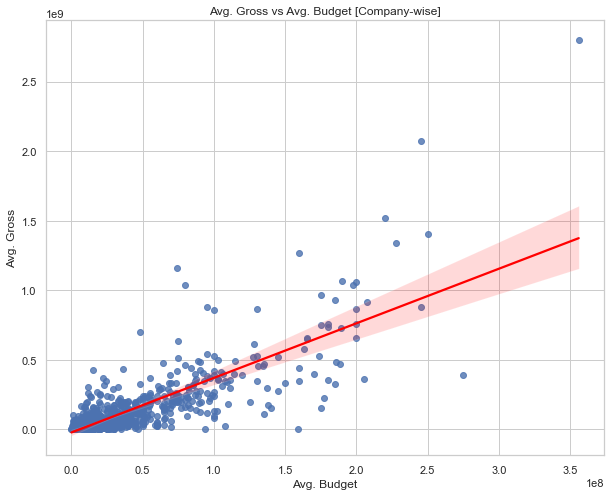

In [120]:
# Visualizing the correlation between ava budget and avg gross of companies between 2010 and 2020

sns.set(rc={'figure.figsize': (10, 8)})
with sns.axes_style("whitegrid"):
    sns.regplot(x=df_mean[df_mean['year'] >= 2010]['budget'], y=df_mean[df_mean['year'] >= 2010]['gross'], line_kws={'color': 'red'})
    plt.xlabel('Avg. Budget')
    plt.ylabel('Avg. Gross')
    plt.title('Avg. Gross vs Avg. Budget [Company-wise]')

### Does a Higher IMDB Rating affect Gross ?

A scatter plot between IMDB Ratings and Gross, using the Dataframe aggregated by parent_company could answer this. This takes the average IMDB Rating of the movies produced by the company against the average Gross of the company.

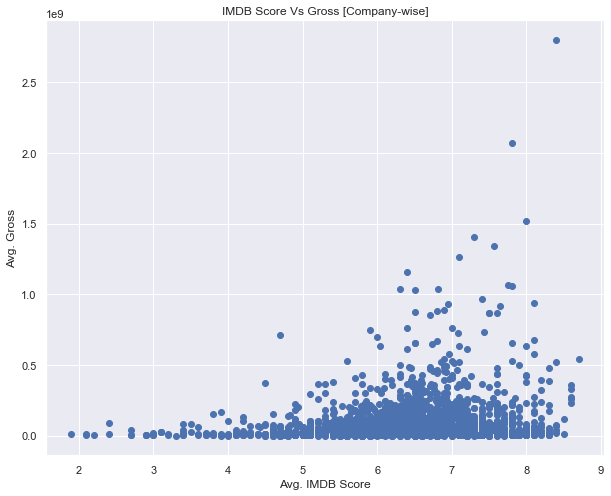

In [122]:
fig = plt.figure()
ax = fig.add_subplot()

# filtering out movie with lesser than 500 vote to avoid outliers
x = df_mean[(df_mean['votes'] >= 500)]['score']
y = df_mean[(df_mean['votes'] >= 500)]['gross']

plt.xlabel('Avg. IMDB Score')
plt.ylabel('Avg. Gross')
plt.title("IMDB Score Vs Gross [Company-wise]")

plt.scatter(x, y)
plt.show()

Can clearly see that all the very high Grossing companies tend to have a higher average IMDB rating as well.

### Analyzing the Film production industtry as a whole

To do this, we can create a new dataframe grouping by 'year'. This will generate averages of budget, gross etc. for all the movies released in that particular year.

In [124]:
# Create a table showing with overall average budget and gross etc. of the film production industry over the years 1980 to 2020
yearly_avg = df.groupby('year', as_index=False).mean().sort_values(by='year', ascending=False)
yearly_avg

,year,score,votes,budget,gross,runtime,profit_pct
40,2020,6.827273,146281.818182,8.799545e+07,2.592008e+08,115.454545,0.503675
39,2019,6.500826,117105.743802,5.540702e+07,2.267999e+08,112.388430,-2.496487
38,2018,6.488194,116387.500000,4.939153e+07,1.945072e+08,112.312500,0.202584
37,2017,6.471918,140611.643836,5.522466e+07,1.969212e+08,112.349315,-0.148422
36,2016,6.616456,147664.556962,5.253291e+07,1.711169e+08,109.443038,-0.145906
35,2015,6.477914,143644.171779,4.592347e+07,1.675178e+08,111.404908,-4.088912
34,2014,6.588199,184528.571429,4.489050e+07,1.543654e+08,110.428571,-2.632185
33,2013,6.544720,191219.875776,5.090248e+07,1.594188e+08,110.708075,-0.478302
32,2012,6.444304,184941.139241,4.827029e+07,1.608359e+08,107.056962,-2.972419
31,2011,6.427059,161945.294118,4.661041e+07,1.383990e+08,108.029412,-3.531362


In [126]:
# Creating an array of years to use as X-axis ticks in graphs

yearList = np.asarray(yearly_avg['year'])
years_x_axis = yearList[0:len(yearList):2]

### What has the growth of the film production industry been like through the years?

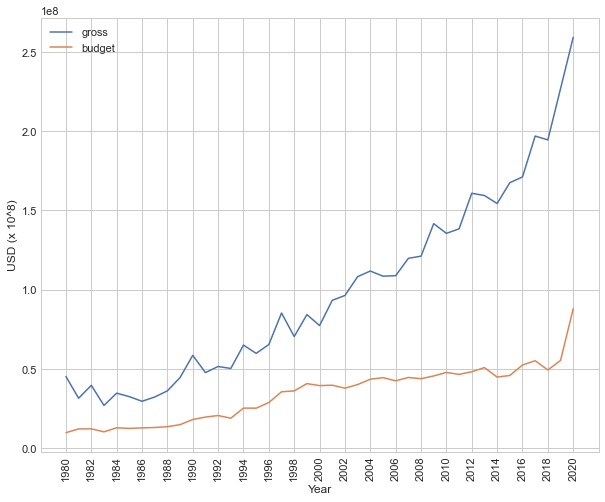

In [128]:
fig2 = plt.figure()
plt.style.use('seaborn-whitegrid')
ax = fig2.add_subplot()
ax.set_xticks(years_x_axis)
ax.set_xticklabels(year_x_axis)
plt.xticks(rotation=90)

x = yearly_avg['year']
y1 = yearly_avg['gross']
y2 = yearly_avg['budget']

plt.plot(yearly_avg['year'], yearly_avg['gross'], label='gross')
plt.plot(yearly_avg['year'], yearly_avg['budget'], label='budget')

plt.xlabel('Year')
plt.ylabel('USD (x 10^8)')

plt.legend()
plt.show()

Plotting Growth of budget & Gross over the years, we can see that:

> 1. Average **budget** of Film Industry has not increased by much over the years (relatively).
> 2. Average **gross** has increased exponentially.

That being said, wa can observe a consistent growth in the Budget as well as the Gross.

### Correlation Analysis [Film Production Industry]

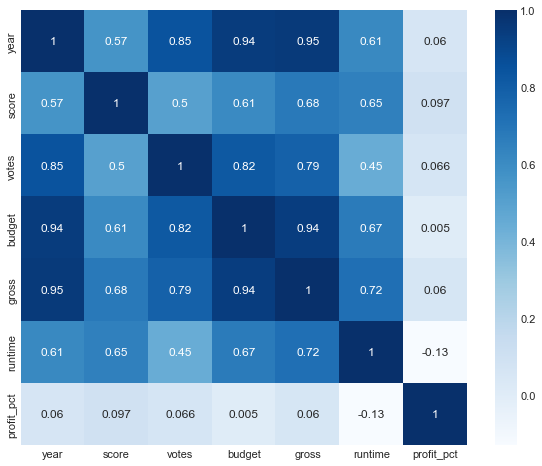

In [130]:
# Let's plot heatmap to visualize correlation on the yearly_avg datafram
yearly_avg.corr(method='pearson')
sns.heatmap(data=yearly_avg.corr(), annot=True, cmap='Blues')
plt.show()

Amazingly high correlation between gross and year. Probably implies, film production industry has had phenomenal growth since 1980

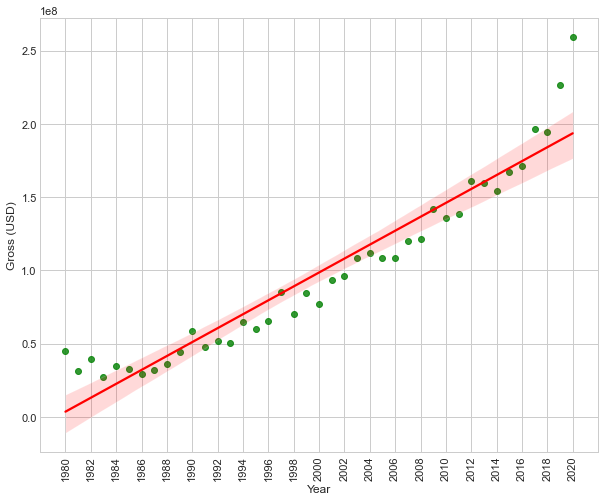

In [132]:
# Let's visualizing correlation between gross and year in the movie industry from 1980 to 2020
reg = sns.regplot(x=yearly_avg['year'], y=yearly_avg['gross'],
                 line_kws={'color':'red'}, scatter_kws={'color':'green'})

reg.set_xlabel('Year')
reg.set_ylabel('Gross (USD)')

reg.set_xticks(year_x_axis)
reg.set_xticklabels(year_x_axis, rotation=90)

plt.show()

the Film Production industry seems to have undergone tremendous growth in this period

### Analyzing whether "Dump Months" really do exist, based on Gross of Movies during these moths

"A dump month is the period of the year where the commercial and critical expectations for films are exceedingly low. Audiences tend to be at their busiest during these periods, keeping them away from the theaters. As a result, studios will spend this time “dumping” the movies that have been deemed lesser. This could be because they were received poorly by test audiences, or because the studio felt that they have a whole host of movies which should be released during more financially lucrative months, such as June and December. This results in there being an excess of very mediocre films during the January period.

Other dump months besides **January** include **February**, and sometimes **August** and **September**"

[ source: https://movies.mxdwn.com/feature/dump-months-what-are-they-and-what-do-they-entail/ ]

Let's check if the above is true, based on this data set

In [133]:
# Create a month column
df['month'] = 'month'

In [134]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry,parent_company,profit_pct,month
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States,Warner Bros.,0.595734,month
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States,Columbia Pictures,0.923538,month
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States,Lucasfilm,0.966566,month
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States,Paramount,0.958060,month
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States,Orion Pictures,0.849422,month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,"January 17, 2020",United States,Columbia Pictures,0.788983,month
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,"February 14, 2020",United States,Paramount,0.734139,month
7650,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,"January 17, 2020",United States,Universal Pictures,0.287133,month
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,"February 21, 2020",United States,20th Century Studios,-0.215061,month


In [136]:
# Populating moth column with values from 0 to 11
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
current_month = 0

for month in months:
    df.loc[df['releasedDate'].str.contains(month), 'month'] = current_month
    current_month += 1

In [137]:
df[df['month'] == 'month']

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry,parent_company,profit_pct,month
312,Five Days One Summer,PG,Drama,1982,6.1,1000.0,Fred Zinnemann,Michael Austin,Sean Connery,United States,15000000.0,199078.0,Cable and Wireless Finance,108.0,1982,Japan,Cable and Wireless Finance,-74.347351,month
800,O.C. and Stiggs,R,Comedy,1985,5.4,1200.0,Robert Altman,Tod Carroll,Daniel Jenkins,United States,7000000.0,29815.0,Metro-Goldwyn-Mayer (MGM),109.0,1985,United States,Metro-Goldwyn-Mayer (MGM),-233.781150,month
1173,The House on Carroll Street,PG,Thriller,1987,6.1,2300.0,Peter Yates,Walter Bernstein,Kelly McGillis,United States,14000000.0,459824.0,Orion Pictures,101.0,1987,United States,Orion Pictures,-29.446432,month
2816,The White Balloon,Unrated,Drama,1995,7.7,6900.0,Jafar Panahi,Abbas Kiarostami,Aida Mohammadkhani,Iran,150000.0,924940.0,Farabi Cinema Foundation,85.0,1995,Iran,Farabi Cinema Foundation,0.837827,month
4187,Dahmer,R,Biography,2019,5.6,9700.0,David Jacobson,David Birke,Jeremy Renner,United States,250000.0,144008.0,Blockbuster Films,101.0,2019,United States,Blockbuster Films,-0.736015,month


These 5 movies had their full date missing

In [138]:
# Let's filling these in manually based on Google Search results.
df.loc[(df['name'] == 'Five Days One Summer'), 'month'] = 10
df.loc[(df['name'] == 'O.C. and Stiggs'), 'month'] = 6
df.loc[(df['name'] == 'The House on Carroll Street'), 'month'] = 2
df.loc[(df['name'] == 'The White Balloon'), 'month'] = 4
df.loc[(df['name'] == 'Dahmer'), 'month'] = 5

In [139]:
# Cross-checking for empty values in month column
df[df['month'] == 'month']

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedDate,releasedCountry,parent_company,profit_pct,month


In [140]:
# Converting month column to int, so corr() can work with it
df['month'] = df['month'].astype(int)

In [141]:
# Let's visualize instead
df[df['year'] >= 2018].corr()

,year,score,votes,budget,gross,runtime,profit_pct,month
year,1.000000,0.045004,0.022529,0.100186,0.054280,0.019714,-0.086709,-0.235869
score,0.045004,1.000000,0.536805,0.182920,0.300845,0.463572,-0.039994,0.109514
votes,0.022529,0.536805,1.000000,0.552378,0.710349,0.529588,-0.041940,0.092466
budget,0.100186,0.182920,0.552378,1.000000,0.783809,0.417245,-0.036551,0.067534
gross,0.054280,0.300845,0.710349,0.783809,1.000000,0.362638,0.095532,0.042704
runtime,0.019714,0.463572,0.529588,0.417245,0.362638,1.000000,-0.280329,0.173570
profit_pct,-0.086709,-0.039994,-0.041940,-0.036551,0.095532,-0.280329,1.000000,-0.099946
month,-0.235869,0.109514,0.092466,0.067534,0.042704,0.173570,-0.099946,1.000000


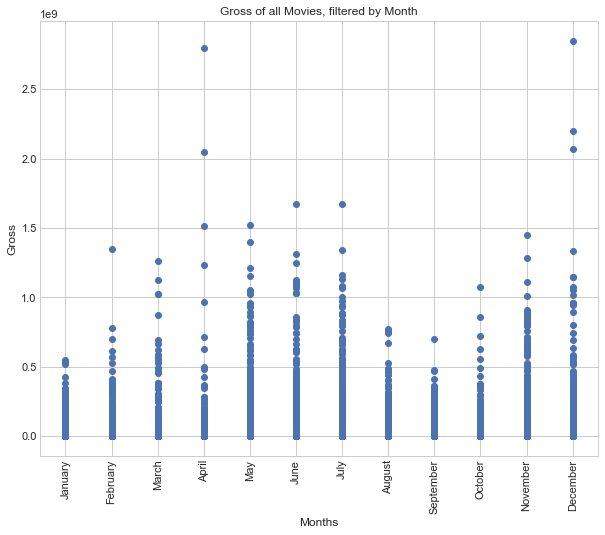

In [142]:
#Visualizing Gross of movies 
fig_monthVsgross = plt.figure()
ax = fig_monthVsgross.add_subplot()
ax.set_xticks(np.arange(0,12,1))
ax.set_xticklabels(months)
plt.xticks(rotation=90)

x = df['month']
y = df['gross']

plt.xlabel('Months')
plt.ylabel('Gross')
plt.scatter(x,y)
plt.title("Gross of all Movies, filtered by Month")
plt.show()

This visualization does verify that January, February, August and September consist of only lower Grossing films, as all of the higher grossing films can be found in the other months.
Many of the higher grossing films have been released in April/December